# **Importing datasets:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Hypertension Dataset for Classification task**

In [2]:
df_h = pd.read_csv("hypertension_data.csv")
df_h.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


* **age**	The patient's age (in years).
* **sex**	The patient's gender (1: male; 0: female).
* **cp**	Chest pain type:
> * 0: asymptomatic
> * 1: typical angina
> * 2: atypical angina
> * 3: non-anginal pain
* **trestbps**	Resting blood pressure (in mm Hg).
* **chol**	Serum cholestoral in mg/dl.
* **fbs**	Whether the patient's fasting blood sugar > 120 mg/dl (1: yes; 0: no).
* **restecg**	Resting ECG results:
> * 0: normal
> * 1: ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
> * 2: probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach**	Maximum heart rate achieved.
* **exang**	Exercise induced angina (1: yes; 0: no).
* **oldpeak**	ST depression induced by exercise relative to rest.
* **slope**	The slope of the peak exercise ST segment:
> * 0: upsloping
> * 1: flat
> * 2: downsloping
* **ca**	Number of major vessels (0–3) colored by flourosopy.
* **thal**	3: Normal; 6: Fixed defect; 7: Reversable defect.
* **target** (target)	Whether the patient has hypertension (1) or not (0).

# **The target/outcome variable and the predictor variables**

**The target variable is :** [target] column, which used to determine if a patient has hypertension disease or not.

**The predictors :** the columns [age,	sex,	cp,	trestbps,	chol,	fbs,	restecg,	thalach,	exang,	oldpeak,	slope,	ca,	thal] are the predictors.	

# **The aim of the dataset**
This dataset is used to pinpoint factors that can cause hypertension. This can help to identify patients at risk of hypertension and provide them with adequate care.

# **Specifying the type of the variables’ values**
* **age**	: quantitative variable
* **sex**	: categorical variable (1: male; 0: female)
* **cp** :	categorical variable [ 0: asymptomatic, 1: typical angina, 2: atypical angina, 3: non-anginal pain ]
* **trestbps**	: quantitative variable
* **chol**	: quantitative variable
* **fbs**	: categorical variable (1: yes; 0: no).
* **restecg**	categorical variable [0: normal, 1: ST-T wave abnormality, 2: probable]
* **thalach**	: quantitative variable
* **exang**	: categorical variable [1: yes; 0: no]
* **oldpeak** :	quantitative variable
* **slope** :	categorical variable [0: upsloping, 1: flat, 2: downsloping]
* **ca**	: categorical variable [0–3]
* **thal** : categorical variable [3: Normal, 6: Fixed defect, 7: Reversable defect]
* **target** : categorical variable [hypertension (1) or not (0)]



---



In [4]:
# creating new dataframe
freq_df = pd.DataFrame(df_h['sex'].value_counts())
# Relative Frequency = Frequency of bin / No. of observations
freq_df['Relative Frequency'] = freq_df['sex']/len(df_h)
# Percent Frequency = (Frequency of bin / No. of observations)*100
freq_df['Percent Frequency'] = (freq_df['sex']/len(df_h))*100
freq_df.rename(columns={"sex": "Absulote Frequency"}, inplace=True)
freq_df

,Absulote Frequency,Relative Frequency,Percent Frequency
0.0,13029,0.499521,49.952076
1.0,13029,0.499521,49.952076




---



#### Construct a Histogram using “Chol” Variable (cholestoral in mg/dl). 

Text(0, 0.5, 'Frequency')

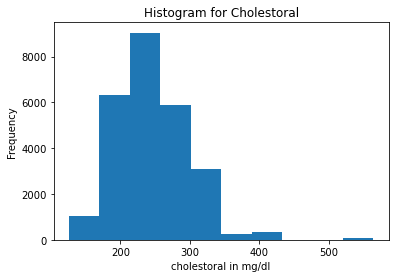

In [6]:
# creating histogram with absolute frequency
plt.hist(df_h['chol'])
 
# Set the legend and labels
plt.title('Histogram for Cholestoral')
plt.xlabel('cholestoral in mg/dl')
plt.ylabel('Frequency')



---



# **Identify noises in all datasets**

### **Missing values**

In [8]:
# Check if there is missing values 
df_h.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [9]:
df_h.shape

(26083, 14)

- Since the missing values are from 'sex' column, we cann't impute a value with zeros or average. 
- The dataset has equal distribution of each gender, so we cann't replace the missing values with mode. 
- It is better to remove these rows because the dataset is large with 26,083 rows and removing the 25 missing rows will not affect the dataset.

In [10]:
# handelling missing values (by removing the rows that contains missing values)
df_h = df_h.dropna()

In [11]:
# checking again
df_h.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### **Duplicated rows**

In [12]:
# checking if there is duplicated rows
df_h.duplicated().sum()

0

It apears that there is no duplicated values

### **Outliers**

<AxesSubplot:>

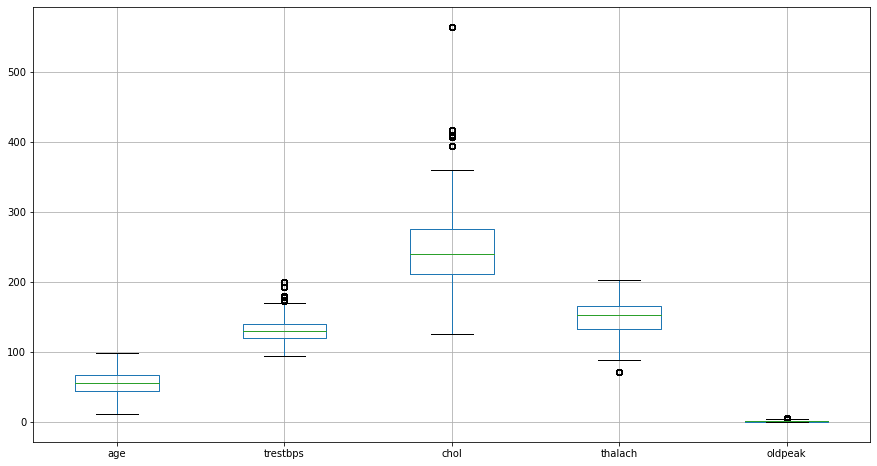

In [13]:
# Check if there any outliers in the quantitative variables by visualization
col_list = df_h.columns
col_list=list(col_list)
df_h.boxplot(column=['age', 'trestbps', 'chol', 'thalach','oldpeak'], figsize=(15,8) )

As we can see, there is some outliers in the columns ['trestbps', 'chol', 'thalach','oldpeak'] and need to be handled.

In [14]:
# handling outliers
# Outlier removal
from numpy import percentile

for col_name in ['trestbps', 'chol', 'thalach','oldpeak']:
    q25, q75 = percentile(df_h[col_name], 25), percentile(df_h[col_name], 75)
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    df_h.loc[df_h[col_name] > upper, col_name] = upper
    df_h.loc[df_h[col_name] < lower, col_name] = lower  

We can detect the outliers and remove it by following these steps:
-	Calculate the interquartile range for the data.
-	Calculate the upper bound by adding 1.5 * (IQR) to the third quartile.
-	Calculate the lower bound by subtracting 1.5 * (IQR) from the first quartile.
-	Any number greater than the upper bound or less than the lower bound is a suspected outlier.
- For all these outliers, replace the value of the outlier with the close upper or lower bound value. 

<AxesSubplot:>

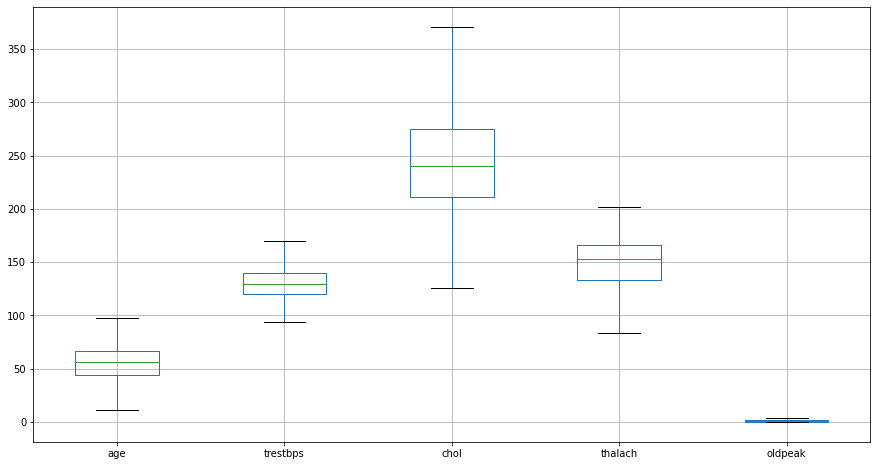

In [15]:
# Checking
col_list = df_h.columns
col_list=list(col_list)
df_h.boxplot(column=['age', 'trestbps', 'chol', 'thalach','oldpeak'], figsize=(15,8) )



---



# **visualize the data**
The maximum number of graphs for each dataset in your report should not exceed four. You are free to select the types of graphs to be included according to your dataset and the types of variables you would like to chart.

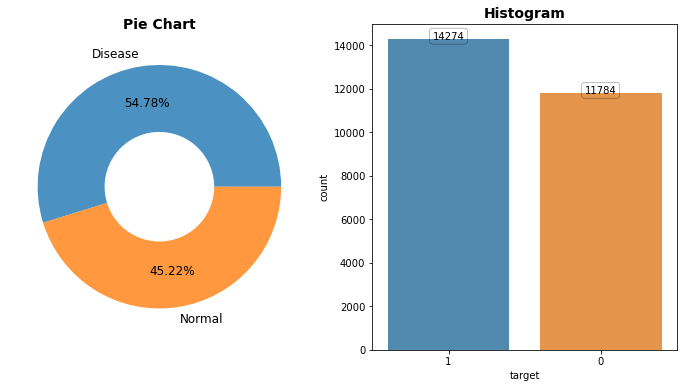

In [25]:
# Plot the target variable to see the distribution of each category

plt.figure(figsize=(12,6))

# Pie Chart 
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df_h['target'].value_counts(), labels=['Disease', 'Normal'], 
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='target', data=df_h, order=df_h['target'].value_counts().index, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

<AxesSubplot:xlabel='sex', ylabel='count'>

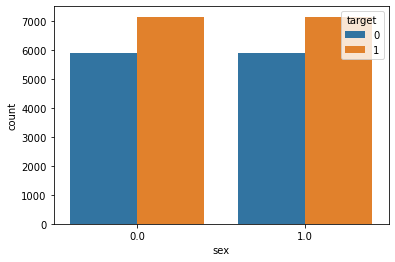

In [26]:
# Examining how the target distributed among each gender
sns.countplot(data=df_h, x='sex', hue='target')



---



# **Using logistic regression to classify observations in the dataset**

In [51]:
from sklearn.linear_model import LogisticRegression
from dmba.metric import AIC_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#### Steps for Logistic Regression Classification
- Choosing the set of predictor.
- Splitting the dataset into training and testing.
- Fit the Logistic Regression on the training set.
- Print the coefficients and the intercept.
- Test the model using the test set.
- Calculate performance metrics.

### Model 1 : Predict using all predictors

In [52]:
X = df_h.drop("target",axis=1)
y = df_h["target"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
lr = LogisticRegression(penalty='l2', C=20, solver='liblinear')
lr.fit(X_train, y_train)

print('intercept ', lr.intercept_[0])
print(pd.DataFrame({'coeff': lr.coef_[0]}, index=X.columns))
print('AIC', AIC_score(y_test, lr.predict(X_test), df = len(X_train.columns) + 1 ))

#prediction
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

#scores
print("Training Accuracy ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy ",accuracy_score(y_test, y_pred_test))

intercept  2.4726602601378773
             coeff
age       0.001095
sex      -0.001638
cp        0.802598
trestbps -0.015698
chol     -0.001472
fbs      -0.206690
restecg   0.540180
thalach   0.017363
exang    -0.974909
oldpeak  -0.674460
slope     0.434108
ca       -0.789545
thal     -1.163566
AIC 5926.6017995373295
Training Accuracy  0.8542189019086118
Testing Accuracy  0.8552570990023024


### Model 2 : Predict using set of 7 predictors

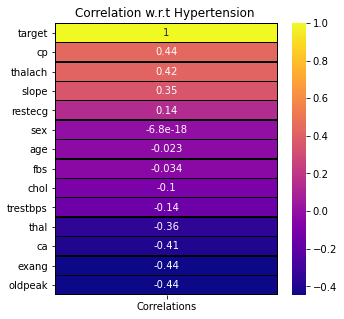

In [55]:
corr = df_h.corrwith(df_h['target']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Hypertension ');

In [57]:
X = df_h.drop(["target",'sex', 'age','fbs','chol','trestbps','restecg'],axis=1)
y = df_h["target"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [59]:
lr = LogisticRegression(penalty='l2', C=2, solver='liblinear')
lr = lr.fit(X_train, y_train)

print('intercept ', lr.intercept_[0])
print(pd.DataFrame({'coeff': lr.coef_[0]}, index=X.columns))
print('AIC', AIC_score(y_test, lr.predict(X_test), df = len(X_train.columns) + 1 ))
#prediction
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
#scores
print("Training Accuracy ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy ",accuracy_score(y_test, y_pred_test))

intercept  0.4429596848782321
            coeff
cp       0.751675
thalach  0.016221
exang   -1.029444
oldpeak -0.668358
slope    0.451325
ca      -0.799484
thal    -1.094908
AIC 5559.666542590745
Training Accuracy  0.8629176687304917
Testing Accuracy  0.8629316960859554


### Model 3 : Try different cut-off values

In [60]:
# Predicted probability
y_predict_prob = lr.predict_proba(X_test)

The model.predict_proba function predicts 2 probabilities, the probability of data point in class 0 and in class 1. 

In [61]:
# Extracting predicted probability of class 1
y_predict_prob_class_1 = y_predict_prob[:,1]

Now we can define a threshold by using list comprehension. 
- the patients with the predicted probability of class 1 larger than 0.6 will be assigned to class 1 (having hypertension)
- ≤ 0.6 predicted probability of class 0 

In [62]:
# Define threshold 0.6
y_predict_class = [1 if prob > 0.6 else 0 for prob in y_predict_prob_class_1]
print("Accuracy:", round(accuracy_score(y_test, y_predict_class), 3))

Accuracy: 0.829


The best performance when choosing the cutoff to be 0.5, since the target variable already has equal distribution in each class.



---



# **Computing the values of sensitivity and precision corresponding to the confusion matrix created using the cutoff value of 0.5**

In [344]:
# Define threshold 0.5
y_predict_class = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1]

Precision: 0.85
Sensitivity: 0.913
Accuracy: 0.863


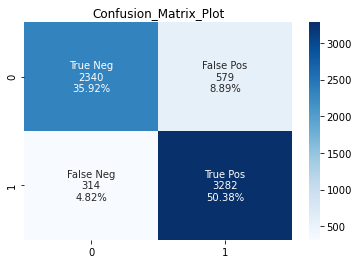

In [66]:
# Calculate the Confusion Matrix
cm = confusion_matrix(y_test,y_predict_class)
names = ['True Neg','False Pos','False Neg','True Pos']  

# Confusion Matrix Plot
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]    
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
plt.title('Confusion_Matrix_Plot')

# Precision
print("Precision:", round(precision_score(y_test, y_predict_class),3) )
# Recal = Sensitivity
print("Sensitivity:", round(recall_score(y_test, y_predict_class),3))
# Accuracy
print("Accuracy:", round(accuracy_score(y_test, y_predict_class), 3))



---

